<h2> Import necessary libraries

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<h3> Load the dataset

In [44]:
lung_cancer_data = pd.read_csv(r"F:\Mindset\lung cancer data.csv")

In [45]:
lung_cancer_data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [46]:
lung_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

<h3> Preprocessing

In [47]:
# Convert categorical columns to numeric GENDER and LUNG_CANCER
le = LabelEncoder()
lung_cancer_data['GENDER'] = le.fit_transform(lung_cancer_data['GENDER'])
lung_cancer_data['LUNG_CANCER'] = le.fit_transform(lung_cancer_data['LUNG_CANCER'])

In [48]:
X = lung_cancer_data.drop('LUNG_CANCER', axis=1)
y = lung_cancer_data['LUNG_CANCER']  

In [49]:
X

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2


In [50]:
y

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int32

<h2> Split the data into training and testing sets

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
#Initialize the models

svm_model = SVC()
dt_model = DecisionTreeClassifier()

<h2> Train the models

In [53]:
svm_model.fit(X_train, y_train)

SVC()

In [54]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

<h2> Make predictions

In [55]:
svm_predictions = svm_model.predict(X_test)

In [56]:
dt_predictions = dt_model.predict(X_test)

<h2>Evaluate the models using classification report and confusion matrix

In [57]:
svm_report = classification_report(y_test, svm_predictions)

C:\Users\gemyr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gemyr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gemyr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
dt_report = classification_report(y_test, dt_predictions)

In [59]:
print("SVM Classification Report:\n", svm_report)

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.92      1.00      0.96        86

    accuracy                           0.92        93
   macro avg       0.46      0.50      0.48        93
weighted avg       0.86      0.92      0.89        93



In [60]:
print("Decision Tree Classification Report:\n", dt_report)

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.57      0.53         7
           1       0.96      0.95      0.96        86

    accuracy                           0.92        93
   macro avg       0.73      0.76      0.75        93
weighted avg       0.93      0.92      0.93        93



In [61]:
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
dt_conf_matrix = confusion_matrix(y_test, dt_predictions)

<h2>Plot the confusion matrices for both models

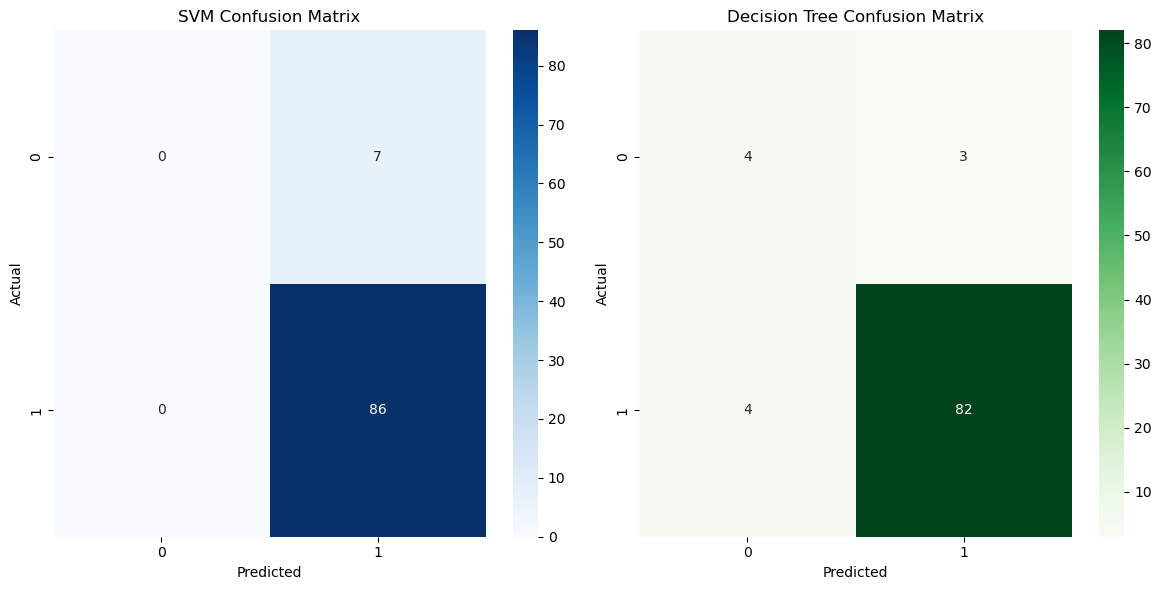

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("SVM Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Decision Tree Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

<h2> Extract feature importances from the decision tree model

In [63]:
feature_importances = dt_model.feature_importances_
features = X.columns

In [64]:
# Sort features by importance

indices = np.argsort(feature_importances)[::-1]

<h2> Plot the feature importances

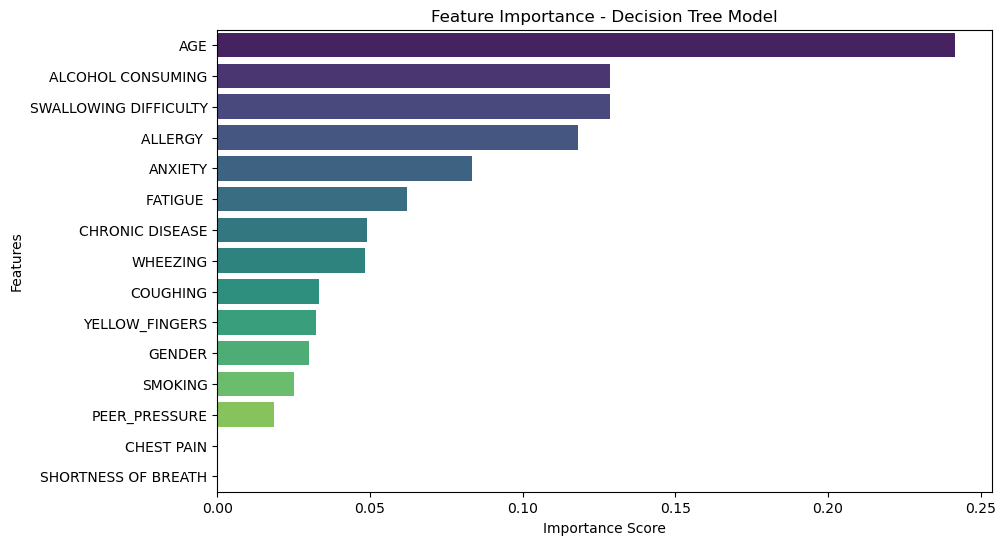

In [65]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[indices], y=features[indices], palette="viridis")
plt.title('Feature Importance - Decision Tree Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

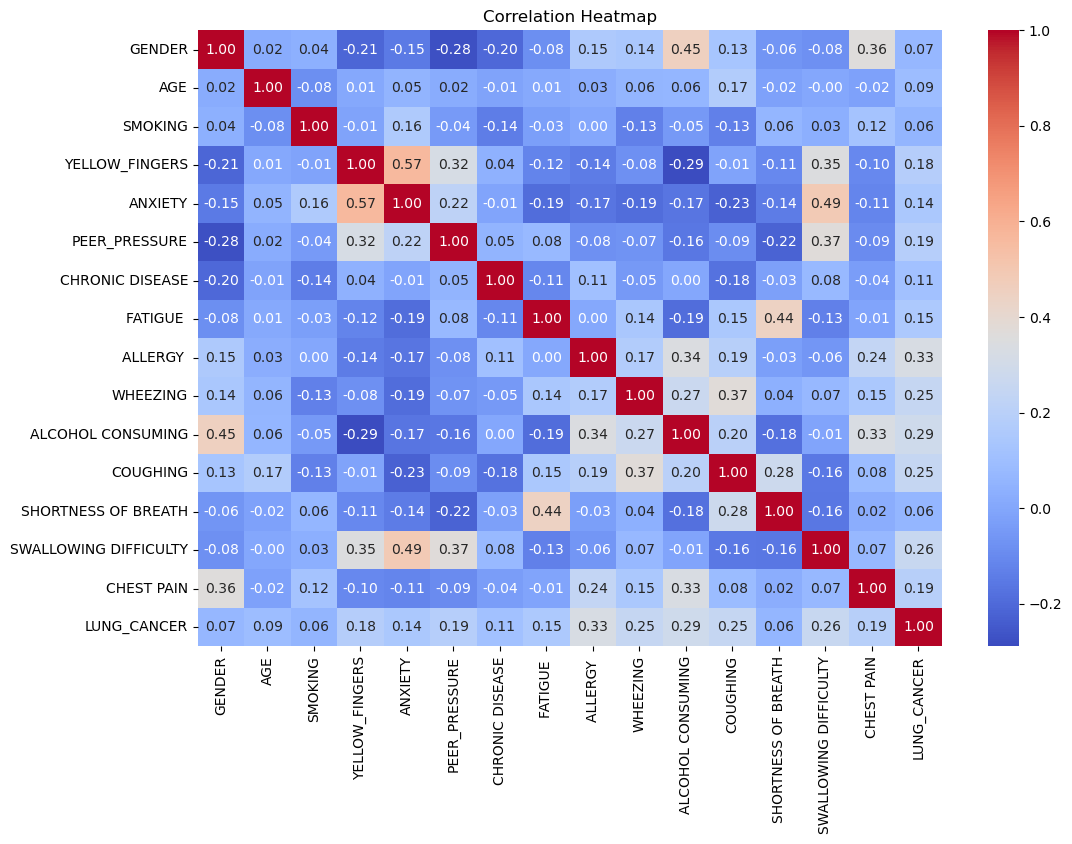

In [66]:
plt.figure(figsize=(12, 8))
corr_matrix = lung_cancer_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

<h2> Pairplot to visualize the relationships between key features and the target

In [67]:
selected_features = ['AGE', 'SMOKING', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'LUNG_CANCER']
lung_cancer_data[selected_features] = lung_cancer_data[selected_features].apply(pd.to_numeric, errors='coerce')
lung_cancer_data_cleaned = lung_cancer_data[selected_features].dropna()

C:\Users\gemyr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


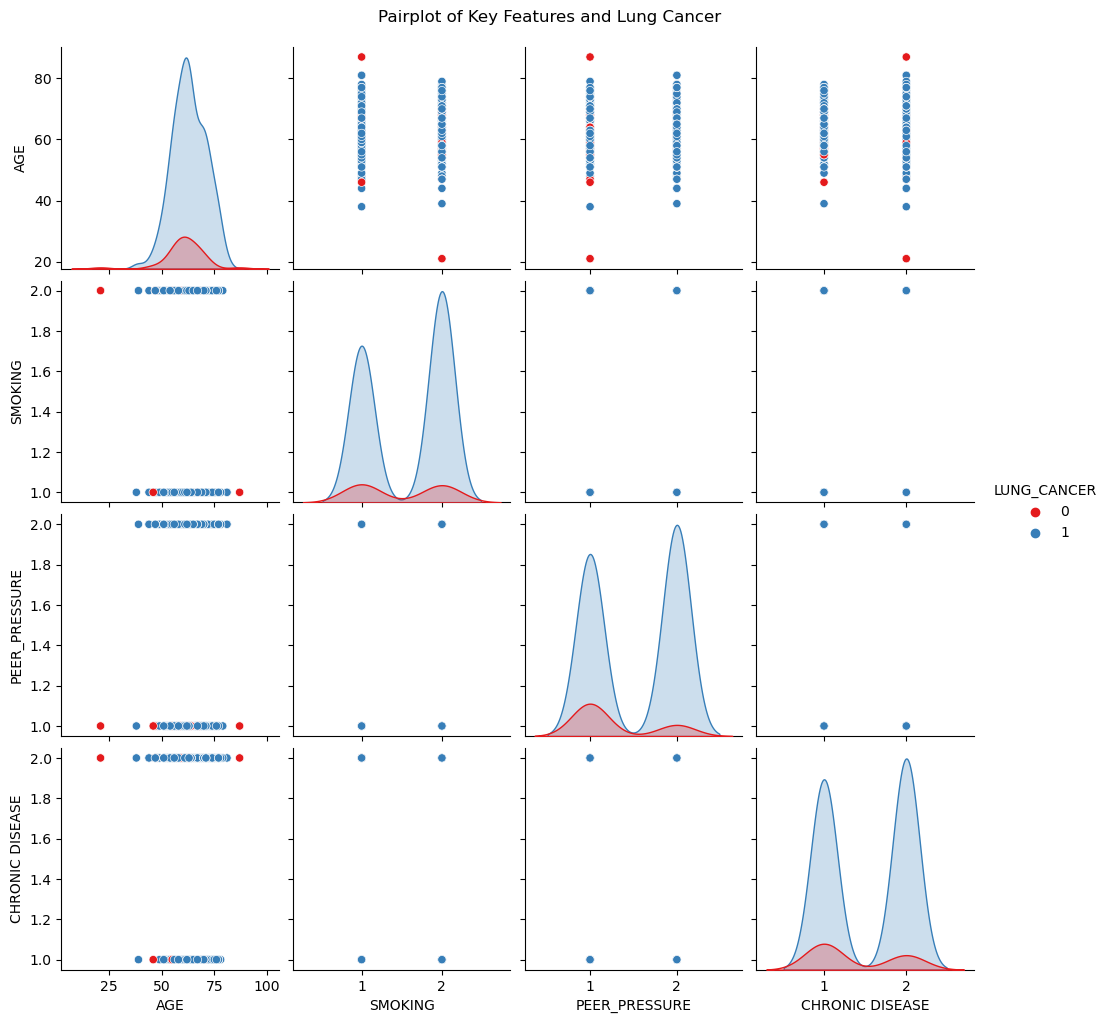

In [68]:
sns.pairplot(lung_cancer_data_cleaned, hue='LUNG_CANCER', palette='Set1')
plt.suptitle('Pairplot of Key Features and Lung Cancer', y=1.02)
plt.show()